<a href="https://colab.research.google.com/github/MartinKahabka/ClIntKahabka/blob/main/01_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# we are going to classify a popular breast cancer dataset
data, target = datasets.load_breast_cancer(return_X_y=True)

In [4]:
# data is a matrix of shape (569, 30)
# the first number refers to the number of cases or samples while the second
# number refers to the number of features from which we try to predict
# breast cancer
#
# please see the documentation @ https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# for more details
data.shape

(569, 30)

In [5]:
# target is a binary vector of size (569,) in which each entry is the label of
# each case, either malignant (0) or benign (1).
target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [6]:
# for simplicity we cut the number of features from 30 to just two features
data = data[:, :2]

Beste weights
w1 = 0.8999999999999995
w2 = 0.19999999999999973
w3 = -17
Accuracy: 0.8963093145869947


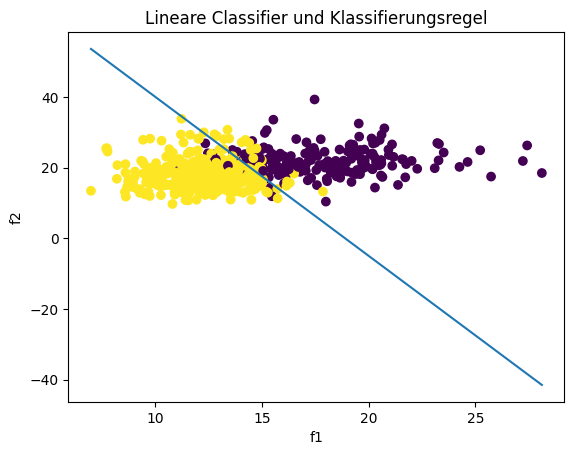

In [22]:
# Excercise 1.1
# Try to find a linear classifier by hand that can classify the dataset
# as good as possible. Let the classification rule be w1 * f1 + w2 * f2 + w3 > 0
# where w1, w2 and w3 are the weights to be learnt and f1, f2 are the features.
# What accuracy can you reach?
best_accuracy = 0
best_preds = None

for w1 in np.arange(-1, 2, step=0.1):
    for w2 in np.arange(-1, 2, step=0.1):
        for w3 in np.arange(-40, 40, 1):
          preds = (w1 * data[:, 0] + w2 * data[:, 1] + w3 > 0).astype(int)
          accuracy = np.mean(preds != target)

          if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_preds = (w1, w2, w3)


w1, w2 ,w3 = best_preds
print("Beste weights")
print("w1 = " + str(w1))
print("w2 = " + str(w2))
print("w3 = " + str(w3))
print(f"Accuracy: {best_accuracy}")

plt.scatter(data[:, 0], data[:, 1], c=target)
x_vals = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y_vals = - (w1 * x_vals + w3) / w2
plt.plot(x_vals, y_vals)
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Lineare Classifier und Klassifierungsregel")
plt.show()



Squared Loss Accuracy : 0.891
w1 = -3.0949727806027587
w2 = -0.7672465589115722
w3 = 0.6844427255407891
Cross Entropy Accuracy: 0.891
w1 = -3.699973244891284
w2 = -0.9344176256406012
w3 = 0.7070869408331119


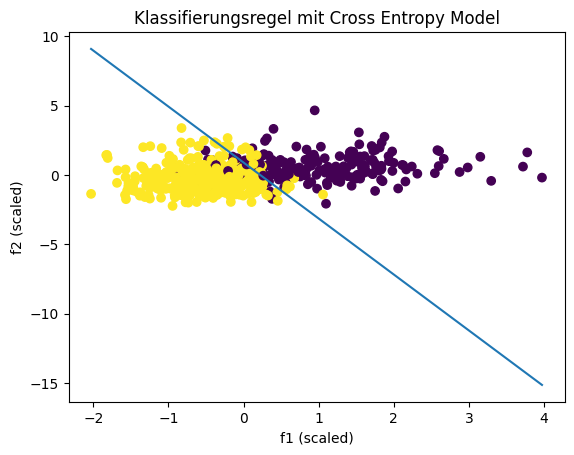

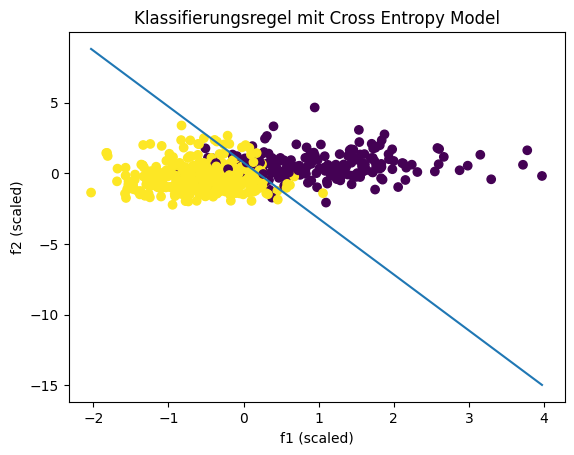

In [37]:
# Excercise 1.2
# Learn the optimal parameters automatically using gradient descent. For the
# loss function use a simple squared loss (t - tp)**2 where t is the target
# label (either 0 or 1) and tp = w1 * f1 + w2 * f2 + w3 is the predicted label.
# What accuracy can you reach? Why is this loss function problematic? Is there
# a better alternative?

# parameter für optimierung
step_rate = 0.1
iterations = 1000

# sklarierung der Daten zu Mittelwert = 0, Standardabw. = 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# transformation zu Wert zwischen 0 & 1 (target liegt zwischen 0 und 1)
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# training für squared loss function
def train_squared_loss(data, target, step=step_rate, epochs=iterations):
    # initalisierung als Nullwerte
    w = np.zeros(3)
    for _ in range(iterations):
        z = w[0]*data[:,0] + w[1]*data[:,1] + w[2]
        p = sigmoid(z)
        # gradient = Ableitung der loss function
        diff = (p - target) * p * (1 - p) * 2
        # berechnung der partiellen Ableitung
        dw1 = np.mean(diff * data[:,0])
        dw2 = np.mean(diff * data[:,1])
        dw3 = np.mean(diff)

        w[0] -= step_rate * dw1
        w[1] -= step_rate * dw2
        w[2] -= step_rate * dw3

    return w

def train_cross_entropy(data, target, step=step_rate, epochs=iterations):
    # initalisierung als Nullwerte
    w = np.zeros(3)
    for _ in range(iterations):
        z = w[0]*data[:,0] + w[1]*data[:,1] + w[2]
        p = sigmoid(z)
        # Berechnung der partiellen Ableitung
        dw1 = np.mean((p - target) * data[:,0])
        dw2 = np.mean((p - target) * data[:,1])
        dw3 = np.mean(p - target)
        # step Size und Gradient
        w[0] -= step_rate * dw1
        w[1] -= step_rate * dw2
        w[2] -= step_rate * dw3

    return w

# Train both models
w_ce = train_cross_entropy(data_scaled, target)
w_sq = train_squared_loss(data_scaled, target)

# accuracy
pred_ce = (sigmoid(w_ce[0]*data_scaled[:,0] + w_ce[1]*data_scaled[:,1] + w_ce[2]) > 0.5).astype(int)
pred_sq = (sigmoid(w_sq[0]*data_scaled[:,0] + w_sq[1]*data_scaled[:,1] + w_sq[2]) > 0.5).astype(int)
acc_ce = np.mean(pred_ce == target)
acc_sq = np.mean(pred_sq == target)

# print results
print(f"Squared Loss Accuracy : {acc_sq:.3f}")
print("w1 = " + str(w_sq[0]))
print("w2 = " + str(w_sq[1]))
print("w3 = " + str(w_sq[2]))

print(f"Cross Entropy Accuracy: {acc_ce:.3f}")
print("w1 = " + str(w_ce[0]))
print("w2 = " + str(w_ce[1]))
print("w3 = " + str(w_ce[2]))


# plots
plt.figure()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target)
x_vals = np.linspace(data_scaled[:, 0].min(), data_scaled[:, 0].max(), 100)
y_vals = - (w_sq[0] * x_vals + w_sq[2]) / w_sq[1]
plt.plot(x_vals, y_vals)
plt.xlabel("f1 (scaled)")
plt.ylabel("f2 (scaled)")
plt.title("Klassifierungsregel mit Cross Entropy Model")
plt.show()

plt.figure()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target)
x_vals = np.linspace(data_scaled[:, 0].min(), data_scaled[:, 0].max(), 100)
y_vals = - (w_ce[0] * x_vals + w_ce[2]) / w_ce[1]
plt.plot(x_vals, y_vals)
plt.xlabel("f1 (scaled)")
plt.ylabel("f2 (scaled)")
plt.title("Klassifierungsregel mit Cross Entropy Model")
plt.show()